# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.3: Ordinary Least Squares

### 1.3.2 Multivariate OLS

In the previous module, we looked at the Ordinary Least Squares (OLS) method for solving Linear Regression problems of the form:

$ Y = X\beta + \boldsymbol{u}$

Where $Y$ is the variable we are attempting to predict (the dependent variable), $X$ is our independent variable (or multiple variables, as we will see in the next notebook), $\beta$ is the parameters we are trying to learn, and $u$ is the error of our model, as we can often not predict data perfectly.

In that previous module, we had just a single input variable (and added another for the constant). Most models have many, many more, including in some cases combinations of features (such as multiplying two feature values together). Multivariate OLS allows this. For instance, we might try and predict a stock price by taking the stock price of several competitors as input.

The actual equation for OLS doesn't change. Instead, our understanding of the components ($Y$, $X$, $\beta$ and $u$) does. Rather than be single vectors or single values, they are instead matrices and vectors.

For those unfamiliar with matrix algebra, we will take a quick detour through this topic, before linking it back to Multivariate OLS at the end of this module.

In [1]:
%run setup.ipy

### Matrix Algebra

Matrices are used for a very wide range of applications. They are rectangular collections of numbers, and follow several rules on multiplying, adding, dividing and other actions. There are a few differences from algebra in more "standard" mathematics, for instance $A \times B \neq B \times A$ in most cases.

In matrix algebra, single values still exist, known as *scalars*:

Mathematically: $a = 1$.

In code:

In [2]:
a = 1

On notation, as it is important going forward, a scalar is almost always written as a standard lowercase letter (specifically, not bold, as we will see soon).

For an ordered list of values, denoted a *vector* in matrix algebra, we use a bold lowercase letter. We can't bold our variable names in Python, so we will just continue to use lowercase letters. If you want to distinguish, some use an underscore: `_u`

Mathematically: $\boldsymbol{u} = [0.1, 0.3, 4.6]$

In code, for the NumPy library:

In [3]:
import numpy as np

u = np.array([0.1, 0.3, 4.6])

For rectangular groups of numbers, known as a **matrix**, we use an uppercase letter:

Mathematically:

$ X = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6 
\end{bmatrix}  $


In code:

In [4]:
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

In NumPy, the word *array* is used, as it can represent both a single vector or a matrix, or even higher-order data! The key distinction is the `shape` and `ndims`:

In [5]:
u.shape

(3,)

In [6]:
u.ndim

1

In [7]:
X.shape

(3, 2)

In [8]:
X.ndim

2

Here we can see that $\boldsymbol{u}$ has one dimension (`u.ndim`), and has a shape indicating it has 3 values in that one dimension.

In contrast, $X$ has two dimensions (`X.ndim`), it has 3 rows, and each row has 2 columns. There are six values total:

In [9]:
X.size

6

#### Exercises

1. Create an array representing the following matrix:
    $ \begin{bmatrix}
    10 & 20 & 30 \\
    40 & 50 & 60 
    \end{bmatrix}  $
2. In the Linear Regression Model, does the value of $\beta$ represent a matrix or vector? Hint: Look up the greek alphabet and determine if it is an uppercase or lowercase letter.

In [13]:
# qs 1
A = np.array([[10, 20, 30],
              [40, 50, 60]])
print(A)

# qs 2
print("beta is a vector as it is 1 dimensional")

[[10 20 30]
 [40 50 60]]
beta is a vector as it is 1 dimensional


*For solutions, see `solutions/an_array.py`*

### Working with matrices

Matrix algebra follows different rules to normal algebra, but it is internally consistent and produces a wide range of benefits. First, a bit more terminology:

$ \begin{bmatrix}
a_{1, 1} & a_{1, 2} & a_{1, 3} \\
a_{2, 1} & a_{2, 2} & a_{2, 3} 
\end{bmatrix}  $

In this matrix, we use the subscripts identify the position of the values. Consider this matrix:

$ X = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6 
\end{bmatrix}  $

Here, the value $5$ is in the third row and first position, so it's position is $(3, 1)$. Let's look at this in code:

In [14]:
X[2, 0]  # Huh!?

5

While the numbering doesn't matter for any of the math we will see in the future, just keep in mind this general pattern:

*In mathematics, we start counting from 1. In Python (and most programming languages), we start counting from zero.*

This can trip up careful examination of the code. Luckily, as you get more familiar working with matrices, you worry less about accessing individual values inside the matrix, and more about how the matrices fit together.

Next, let's look at the most basic operations in matrix algebra, between a scalar and a matrix or vector. Multiplying a matrix or a vector by a scalar simply does that operation on every element inside the matrix/vector, known as an *elementwise* operation:

In [15]:
X * 2  # Multiplies every value inside X by 2

array([[ 2,  4],
       [ 6,  8],
       [10, 12]])

In [16]:
X + 3  # Adds 3 to every value inside X

array([[4, 5],
       [6, 7],
       [8, 9]])

In [17]:
X / 10

array([[0.1, 0.2],
       [0.3, 0.4],
       [0.5, 0.6]])

In [18]:
X - 100

array([[-99, -98],
       [-97, -96],
       [-95, -94]])

Note that the shape of the matrix doesn't change (we will see this happen next) when doing operations with scalars like this.

The most impactful matrix algebra method is known as the *dot product*:

In [19]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([[10, 20],
              [30, 40],
              [50, 60]])

In [20]:
A.dot(B)  # If you are using Python 3.5+, try: A @ B

array([[220, 280],
       [490, 640]])

In [21]:
A@B

array([[220, 280],
       [490, 640]])

The dot product has a key requirement. The "inner dimensions" must match. In the above examine, we are computing the dot product of $A$ and $B$. The order is important. $A$ has a shape of 2 by 3, and $B$ has a shape of 3 by 2. The "inner values", i.e. 3, match, so we can compute the dot product.

This operation, in contrast, doesn't work, because $C$ is of shape 4 by 3, and the inner dimension doesn't match:

In [22]:
try:
    C = np.arange(12).reshape(4, 3)
    A.dot(C)
except ValueError as e:
    print("Could not compute dot product of matrices. Error was:")
    print(e)

Could not compute dot product of matrices. Error was:
shapes (2,3) and (4,3) not aligned: 3 (dim 1) != 4 (dim 0)


In a dot product, the resulting matrix will be the size of the outer dimensions. In our previous (working) example, $AB$, the outer dimensions were both 2, so the resulting value was a 2 by 2 matrix.

The values of the dot product are the *sum of the products* from the original two matrices, from the row of the first matrix and the column of the second matrix. In other words, for position (i, j) in the dot product, we get the ith row from the first matrix, and the jth column of the second matrix. For our example $AB$, and for position (2, 1) of the dot product, the second row of $A$ is $[4, 5, 6]$ and the first column of $B$ is $[10, 30, 50]$. We then sum the products of the individual values:

$result = 4 \times 10 + 5 \times 30 + 6 \times 50 = 490$

We repeat this process for every row/column combination, resulting in the dot product matrix, obtaining the result we saw above.

When we compute the dot product including a vector, we need to make the distinction between a *row vector* and a *column vector*. In short, a *row vector* can be thought of as a matrix with one row, and a *column vector* as a matrix with one column. From here, the rules are the same as above (i.e. the inner dimensions must match and so on, just some of those dimension values are 1s).


In [23]:
V1 = np.array([[10, 20, 30]])  # Note the double brackets, which create a two dimensional array
V1.shape

(1, 3)

In [24]:
B.shape

(3, 2)

In [25]:
V1.dot(B)

array([[2200, 2800]])

In [26]:
np.matmul(V1,B)

array([[2200, 2800]])

In [27]:
V1.transpose()

array([[10],
       [20],
       [30]])

#### Exercises

1. Create a column vector `V2` such that the value `B.dot(V2)` can be computed. 
2. What is the dot product when all values in `V2` are ones?
3. You can transpose any NumPy array with two dimensions or more by calling `X.transpose()` or `X.T`. What does this function do? Hint: Look at the shape of the array

In [34]:
print("original matrix")
print(B)

# qs 1
V2 = np.array([[1], [1]])
print("Column vector which can compute the dot produce of B with")
print(V2)

# qs 2
print("dot product when all values in v2 are ones is row-wise sum")
print(B.dot(V2))

# qs 3
print("Transpose flips the matrix on its side, or swaps the values symmetrically along the diagonal")
print(B.T)

original matrix
[[10 20]
 [30 40]
 [50 60]]
Column vector which can compute the dot produce of B with
[[1]
 [1]]
dot product when all values in v2 are ones is row-wise sum
[[ 30]
 [ 70]
 [110]]
Transpose flips the matrix on its side, or swaps the values symmetrically along the diagonal
[[10 30 50]
 [20 40 60]]


*For solutions, see `solutions/matrix_products.py`*

### Matrix algebra terminology and properties

There are quite a few bits of terminology that are important to know before going forward:

* **square matrix**: A matrix where the number of rows is equal to the number of columns
* **diagonal matrix**: A square matrix, where only values on the diagonal are non-zero and all other values are zero. That is, for value in position (i, j), it is zero if $i\neq j$, and *may be non-zero* only if $i=j$
* **identity matrix**: A diagonal matrix where *all* diagonal elements are 1. It is denoted as $I$, and usually the size is implied by the context (i.e. if you are computing the dot product $XI$, then $I$ will be a square matrix with the size of the second dimension of $X$).
* **scalar matrix**: A diagonal matrix where *all* diagonal elements are some scalar value. Its size too can often be implied by the context.
* **transpose**: rotating a matrix 90°, denoted by a quote symbol. That is, the transpose of $A$ is $A'$, and it has values such that $A_{i, j} = A'_{j, i}$. The transpose of the transpose of a matrix is equal to the original matrix, i.e. $A'' = A$.
* **symmetric matrix**: A matrix that is equal to its transpose.
* **null matrix/vector**: A matrix/vector where all values are 0. Its size is often implied from the context.


#### Exercises

1. Use the `np.arange` and `np.reshape` functions to create a square matrix
2. Use the `np.diag` function to create a diagonal matrix
3. Use the `np.eye` function to create an identity matrix
4. Create a scalar matrix
5. Use the `np.zeros` function to create a null matrix of size 4 by 5

In [36]:
# qs1
SQ = np.arange(9).reshape([3,3])
print("reshape matrix")
print(SQ)

# qs2
DG = np.diag([3,3,3])
print("diagonal matrix")
print(DG)

# qs3
I = np.eye(3)
print("identity matrix")
print(I)

# qs4
SC = I * 9
print("scalar matrix")
print(C)

# qs5
Z = np.empty([4,5])
print("4 x 5 matrix")
print(Z)

reshape matrix
[[0 1 2]
 [3 4 5]
 [6 7 8]]
diagonal matrix
[[3 0 0]
 [0 3 0]
 [0 0 3]]
identity matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
scalar matrix
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
4 x 5 matrix
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


*For solutions, see `solutions/matrix_terminology.py`*

### Matrix inversion

The inverse of a matrix ($A$) is a matrix ($A^{-1}$) satisfying the equation $A^{-1}A = AA^{-1} = I$, remembering that $I$ is the identity matrix, a square matrix with all ones on the diagonal, and zeros elsewhere.

If $A$ is a matrix of size $(n, m)$, then $I$ must be of size $(n, n)$. This is due to the dot product, meaning the inverse must be of size $(m, n)$ to compute the dot product in the first place. However, the inverse can only be computed for square matrices. The size of $A$ in this process will be $(n, n)$, so the inverse must also be $(n, n)$.

Not every square matrix has an inverse. Looking at how to compute the inverse of a matrix will take us a little too far off topic for now. To investigate this further, start with this website from Wolfram: http://mathworld.wolfram.com/MatrixInverse.html

We can compute the inverse using the `np.linalg.inv` function.

In [37]:
D = A.dot(B)  # Note: D is square

In [38]:
D_inverse = np.linalg.inv(D)

In [39]:
D_inverse

array([[ 0.17777778, -0.07777778],
       [-0.13611111,  0.06111111]])

In [40]:
D.dot(D_inverse)

array([[ 1.00000000e+00, -1.66533454e-15],
       [-7.10542736e-15,  1.00000000e+00]])

In [41]:
# Due to floating point math on computers, the values are close-to-but-not-exactly the identity matrix
D.dot(D_inverse) == np.eye(2)

array([[False, False],
       [False, False]])

In [42]:
# This function can help us do this comparison
np.allclose(D.dot(D_inverse), np.eye(2))  

True

### Multivariate OLS derivation

Now that we have an understanding of matrix algebra, we can review our model for the Linear Regression model to incorporate multiple values. That said, what does our input data actually look like?

We often use $X$ as our set of independent variables. It is a carefully constructed matrix, with size $n$ by $k$, where $n$ is the number of samples, and $k$ is the number of measurements *per sample*. It is critically important that samples and measurement types are aligned. That is, all values for row $i$ must correspond to the same sample $i$, and all values in column $j$ must correspond to the same measurement type for each sample. Therefore, the value in $X_{i, j}$ is measurement type $j$ for sample $i$.

As an example, a sample could be a given day. A measurement type could be "closing price of IBM". Therefore, the corresponding value would be the closing price of IBM on that given day. Another measurement for that day could be "number of trades for MSFT". Another could be temperature. These multiple measurements of the same sample would appear in the same row. Each column would be the same *type* of measurement, for multiple samples.

Additionally, it helps the Linear Regression model significantly to add a bias to the model. To do this, simply have one of the "measurements" (usually the first) simply always return the scalar 1. That makes your first column in $X$ just ones, and then the actual measurements take up the rest of the columns. To visualise why this is important, consider the following two models:

In [43]:
x = np.linspace(-100, 100, 1000)

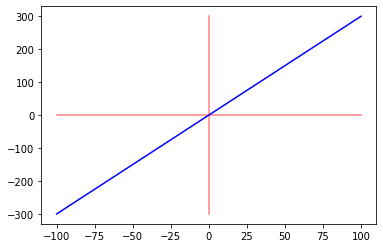

In [44]:
# Without a "1" bias column
gradient = 3
y1 = x * gradient

# Plot the origin axes in red
plt.plot(x, np.zeros(len(x)), 'r-', alpha=0.5)
plt.plot(np.zeros(len(y1)), y1, 'r-', alpha=0.5)

# Plot the data in blue
plt.plot(x, y1, 'b-')

In the above plot, we can change the gradient, but the line must go through the origin (try it!). If we add a bias, we can then have lines that do not go through the origin:

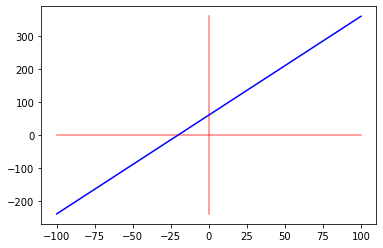

In [45]:
gradient = 3
bias = 60

y2 = gradient * x + bias

# Plot the origin axes in red
plt.plot(x, np.zeros(len(x)), 'r-', alpha=0.5)
plt.plot(np.zeros(len(y2)), y2, 'r-', alpha=0.5)

# Plot the data in blue
plt.plot(x, y2, 'b-')

This result is true too of higher-dimensional data. This gives our model much more predictive power, simply by adding ones to our matrix! The $\beta$ values for this constant column are learned in the same way that the other variables.

Now that we have the format for $X$, let's look at the shape of the other parts of the Linear Model. As a reminder, we have denoted the shape of $X$ as an $n$ by $k$ matrix, where $n$ is the number of samples and $k$ is the number of measurements (also called "features").

* $\boldsymbol{y}$ is a column vector with shape $n$ by 1. It is the predicted value, for each sample.
* $\beta$ is a column vector with shape $k$ by 1. It is the value we multiply each measurement by, i.e. each measurement's "weight"
* $\boldsymbol{u}$ is the error term for the prediction of each sample. It therefore has shape $n$ by 1.

Using this information and our new knowledge of matrix algebra, we can derive the OLS Estimator for multivariate OLS, where $X$ contains multiple measurements:

$$
\begin{align*}
u'u & = (y - Xb)'(y - Xb) \\
    & = y'y - y'Xb - b'X'y + b'X'Xb \\
    & = y'y - 2b'X'y + b'X'Xb
\end{align*}
$$


Setting $\frac{ \partial(\boldsymbol{u'}\boldsymbol{u})}{ \partial\beta} = 0$ yields:

$$
\begin{align}
0 &= -2X'y + 2X'Xb \\
b &= (X'X)^{-1}X'y
\end{align}
$$

Let us now have a look at how to do multivariate OLS within code, in the `statsmodels` package, using two interfaces, the functional and the formula interface.

In [91]:
# First, get the data - interest rates, inflation and AUD from Quandl

In [46]:
import quandl

quandl.ApiConfig.api_key = 'hPGPuToY_GBPFpx5zsyM'
interest_rates = quandl.get("RBA/F13_FOOIRATCR")
interest_rates = interest_rates[interest_rates.columns[0]]  # Extract the first column, whatever it is called
interest_rates.name = "InterestRate"  # Rename, as the original had a long name. Hint: don't use spaces or special chars

In [47]:
interest_rates.head()

Date
1990-01-31    17.0
1990-02-28    16.5
1990-03-31    16.5
1990-04-30    15.0
1990-05-31    15.0
Name: InterestRate, dtype: float64

In [48]:
inflation = quandl.get("RBA/G01_GCPIAGSAQP")
inflation.columns = ['Inflation']

In [49]:
inflation = inflation.iloc[:, 0]  # Another way to achieve the same "get the first column"

In [50]:
inflation.head()

Date
1982-06-30    2.5
1982-09-30    3.5
1982-12-31    2.7
1983-03-31    2.4
1983-06-30    2.2
Name: Inflation, dtype: float64

In [51]:
au_dollar = quandl.get("BUNDESBANK/BBEX3_M_AUD_USD_CM_AC_A01")['Value']
au_dollar.name = "AUDUSD"

In [52]:
au_dollar.head()

Date
1974-01-31    1.4875
1974-02-28    1.4875
1974-03-31    1.4875
1974-04-30    1.4875
1974-05-31    1.4875
Name: AUDUSD, dtype: float64

In [104]:
# Join data together to create a dataset

In [53]:
data = pd.concat([interest_rates, inflation, au_dollar], axis=1)  # Combines multiple series into a DataFrame

In [54]:
data.dropna(inplace=True)
len(data)

125

In [55]:
data.head()

,InterestRate,Inflation,AUDUSD
Date,,,
1990-03-31,16.5,1.6,0.7542
1990-06-30,15.0,1.8,0.7890
1990-09-30,14.0,0.9,0.8265
1990-12-31,12.0,2.4,0.7733
1991-03-31,12.0,-0.2,0.7752


In [56]:
# Using the interest rate and USD conversion to predict Inflation
X = data[["InterestRate", "AUDUSD"]]
y = data['Inflation']

In [57]:
import statsmodels.api as sm
# Nice helper function from statsmodels for adding a bias/constant
X = sm.add_constant(X)

In [58]:
X.head()

,const,InterestRate,AUDUSD
Date,,,
1990-03-31,1.0,16.5,0.7542
1990-06-30,1.0,15.0,0.7890
1990-09-30,1.0,14.0,0.8265
1990-12-31,1.0,12.0,0.7733
1991-03-31,1.0,12.0,0.7752


In [59]:
# Fit an OLS model and get a summary
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     6.929
Date:                Tue, 03 Jan 2023   Prob (F-statistic):            0.00141
Time:                        15:11:28   Log-Likelihood:                -100.11
No. Observations:                 125   AIC:                             206.2
Df Residuals:                     122   BIC:                             214.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2446      0.308      0.794      0.429      -0.365       0.855
InterestRate     0.0646      0.017      3.720      0.000       0.030       0.099
AUDUSD           0.0730      0.385      0.190      0.850      -0.688       0.834
==============================================================================
Omnibus:                       49.562   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.460
Skew:                           0.997   Prob(JB):                     1.25e-99
Kurtosis:                      12.136   Cond. No.                         56.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We'll come back to what these values mean in the next notebook.

In [60]:
y_pred = est.predict(X)
y_pred.name = "PredictedInflation"

<AxesSubplot:xlabel='Date'>

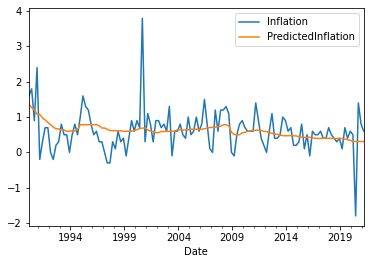

In [61]:
pd.concat([y, y_pred], axis=1).plot()

Our OLS model is able to roughly model the general trend of the inflation!

<div class="alert alert-warning">
    Don't get too excited about the quality of that prediction! We are currently overfitting that data, so we haven't determined the actual predictive power of the model. In short, to evaluate your model you must evaluate using data the model hasn't seen before.
</div>

#### Exercises

Perform a more robust evaluation of the model by following these steps:

1. Split your input data (the `data` variable) into two-thirds training and one-third testing.
2. Fit the model *only* on the training data
3. Predict the testing data and evaluate the results.

Mean squared error = 15.428164313719911


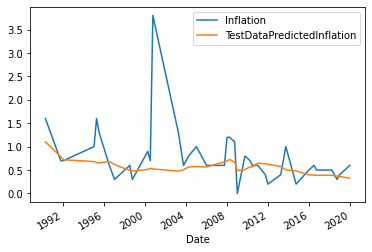

In [63]:
# qs 1 - split data into random train/test
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(data, test_size=1/3, random_state=25)

# qs 2 - fit model
est_mod = sm.OLS(training_data['Inflation'], training_data[["InterestRate", "AUDUSD"]]).fit()
est_mod.summary()

# qs 3 - use model to prediction
test_pred = est_mod.predict(testing_data[["InterestRate", "AUDUSD"]])
test_pred.name = "TestDataPredictedInflation"

pd.concat([testing_data['Inflation'], test_pred], axis=1).plot()

# compute error
err = np.sum((testing_data['Inflation'] - test_pred)**2)
print("Mean squared error = " + str(err))


*For solutions, see `solutions/ols_train_test.py`*

### Using the Formula interface

The second method of performing multivariate OLS using statsmodels is using the formula interface. It is faster to develop using the formula interface, but has it's own mini "R-like" language to learn to create the formulas. That said, it automatically does things like expand multiplied variables, adds constants and can perform basic computations (try calling `np.log` inside the formula!).

The Formula interface is likely better for most development needs. However if you need fine grained control over the variables, you may need to drop back to the previous object-oriented interface.

In [64]:
import statsmodels.formula.api as smf
est = smf.ols(formula='Inflation ~ InterestRate + AUDUSD', data=data).fit()  # Adds the constant for us

<AxesSubplot:xlabel='Date'>

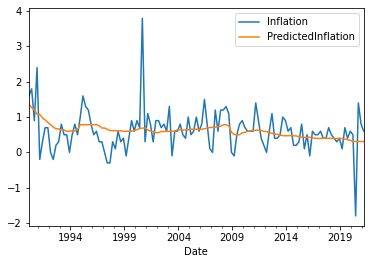

In [65]:
y_pred = est.predict(X)
y_pred.name = "PredictedInflation"
pd.concat([y, y_pred], axis=1).plot()

Using this method, we can also more easily modify the formula, for instance, to incorporate a new feature which is the interaction between Interest Rate and AUD/USD:

In [66]:
import statsmodels.formula.api as smf
est = smf.ols(formula='Inflation ~ InterestRate + AUDUSD + (InterestRate * AUDUSD)', 
              data=data).fit()  # Does the constant for us

<AxesSubplot:xlabel='Date'>

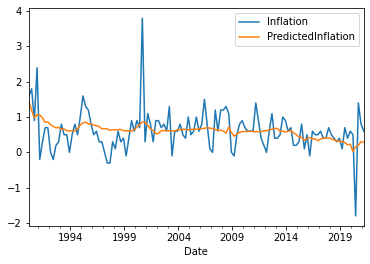

In [67]:
y_pred = est.predict(X)
y_pred.name = "PredictedInflation"
pd.concat([y, y_pred], axis=1).plot()

#### Exercises

1. Perform the same train/test split that we did for the previous exercises
2. Review the documentation for the formula API: https://www.statsmodels.org/dev/example_formulas.html
3. Try a few different combinations of the input parameters to get better predictive power.

Running model: Inflation ~ InterestRate
Mean squared error = 13.384712375689888
Running model: Inflation ~ InterestRate + AUDUSD
Mean squared error = 13.488703693811685
Running model: Inflation ~ InterestRate * AUDUSD
Mean squared error = 12.565607357834592
Running model: Inflation ~ InterestRate + AUDUSD + (InterestRate * AUDUSD)
Mean squared error = 12.565607357834592
Running model: Inflation ~ InterestRate + AUDUSD + (InterestRate * AUDUSD) + AUDUSD**2
Mean squared error = 12.565607357834592


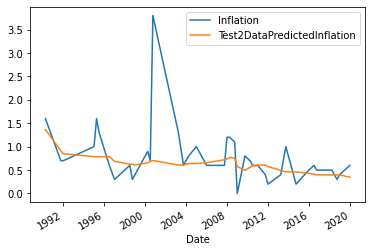

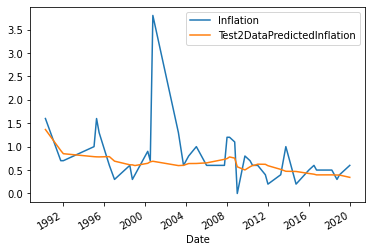

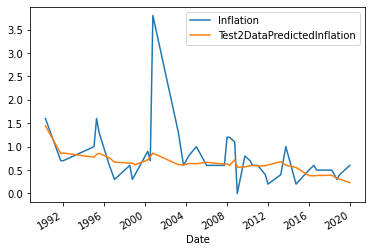

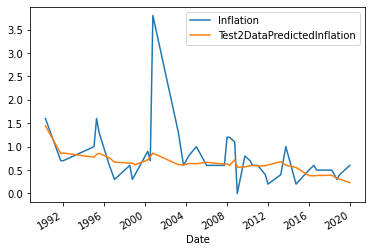

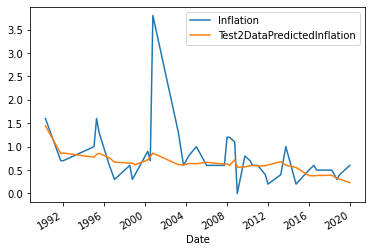

In [69]:
# qs 1 - split data into random train/test
training_data, testing_data = train_test_split(data, test_size=1/3, random_state=25)

# Fit an OLS model and get a summary
formulas = ['Inflation ~ InterestRate',
            'Inflation ~ InterestRate + AUDUSD',
            'Inflation ~ InterestRate * AUDUSD',
            'Inflation ~ InterestRate + AUDUSD + (InterestRate * AUDUSD)',
            'Inflation ~ InterestRate + AUDUSD + (InterestRate * AUDUSD) + AUDUSD**2',
            ]

for f in formulas:

    # fit model
    est_mod2 = smf.ols(formula = f, data=data).fit() 

    # predict
    test_pred2 = est_mod2.predict(testing_data[["InterestRate", "AUDUSD"]])
    test_pred2.name = "Test2DataPredictedInflation"

    pd.concat([testing_data['Inflation'], test_pred2], axis=1).plot()

    # compute error
    err = np.sum((testing_data['Inflation'] - test_pred2)**2)
    print("Running model: " + f)
    print("Mean squared error = " + str(err))

*For solutions, see `solutions/statsmodels_formula_ols.py`*